# Sentiment Analysis

Sentiment Analysis using the Textblob module. TextBlob returns the polarity of an article (from -1 to 1, where -1 represents negative and 1 represents positive) and the subjectivity of an article (from 0 to 1, where 0 is completely factual and 1 is completely opinionated. 

Next Meeting:
* Read articles again 
* Try some basic sentiment analysis



## Textblob API

In [5]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,article
nyt,Among the first things I did upon learning abo...
fox,"On the afternoon of March 16, police say, a 21..."
cnn,"At an office where I worked some years ago, a ..."
ac,It is striking to see how quickly our media ha...


In [10]:
# sentiment analysis - polarity and subjectivity

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['article'].apply(pol)
data['subjectivity'] = data['article'].apply(sub)
data['source'] = data.index
data

,article,polarity,subjectivity,source
nyt,Among the first things I did upon learning abo...,-0.009886,0.372951,nyt
fox,"On the afternoon of March 16, police say, a 21...",0.077954,0.459656,fox
cnn,"At an office where I worked some years ago, a ...",-0.058618,0.428869,cnn
ac,It is striking to see how quickly our media ha...,0.077946,0.385631,ac


In [ ]:
# lambda + apply notes

# lambda basically returns a funciton that takes x as input and returns TextBlob(x).sentiment.polarity function as output
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data['polarity'] = data['article'].apply(pol)
data['subjectivity'] = data['article'].apply(sub)
# another way is using traditional functions then passing the names of the functions
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
data['polarity'] = data['article'].apply(getPolarity)
data['subjectivity'] = data['article'].apply(getSubjectivity)
# the .apply() method of a dataframe column takes in a function, applies it to the column, and returns the modified column


# more lambda testing
func = lambda x: x + 10
print(func(10))

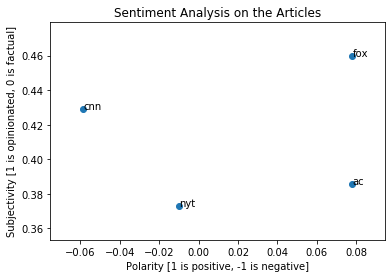

In [35]:
# plot the results

import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.scatter(data['polarity'], data['subjectivity'])

for i in data['source']:
    # print(data['source'][i])
    plt.annotate(data['source'][i], (data['polarity'][i], data['subjectivity'][i]))

plt.title('Sentiment Analysis on the Articles')
plt.xlabel('Polarity [1 is positive, -1 is negative]')
plt.ylabel('Subjectivity [1 is opinionated, 0 is factual]')

    
plt.show()

### Analysis
* CNN and NYT are more negative, while FOX and AC are more positive.
* CNN and FOX are more opinionated, while NYT and AC are less opinionated. (Though, all articles are fairly opinionated, since they are opinionated articles.)

## Other APIs? (Watson, etc)